## Pair Programming Correlación y covarianza

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [1]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import researchpy as rp
from scipy.stats import levene
plt.rcParams["figure.figsize"] = (10,8) 

In [2]:
sales = pd.read_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales2.csv",index_col =0)
sales.sample(2)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type,mes,año
887,360,Washington,West,Small Market,31.0,43.0,81.0,33.0,22.0,10.0,...,30.0,40.0,70.0,4,2011-09-01,Espresso,Caffe Latte,Regular,9,2011
3924,937,Ohio,Central,Major Market,25.0,44.0,73.0,29.0,19.0,8.0,...,20.0,40.0,60.0,8,2010-12-01,Herbal Tea,Chamomile,Decaf,12,2010


1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

La covarianza depende de la escala de las variables y la correlación toma valores entre -1 y 1. La covarianza indica si ambas variables varían el la misma dirección (si una aumenta y la otra también sería positiva y si una aumenta y la otra disminuye, sería covarianza negativa). La correlación es similar sólo que indica de qué tipo es : si es 0 , no hay correlación y cuanto más se acerque este valor a 1 ó -1 más fuerte será.

2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.


In [3]:
sales.corr() # correlacion

,area_code,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid,mes,año
area_code,1.000000,0.050748,2.308368e-02,0.032290,4.488220e-02,0.021877,3.496933e-02,4.616755e-02,3.483950e-02,6.677389e-02,2.406648e-02,4.682453e-02,2.429694e-02,1.348084e-02,-1.135428e-02
profit,0.050748,1.000000,6.795169e-01,0.678077,5.606321e-01,0.168639,3.389347e-01,3.717790e-01,7.864897e-01,4.832407e-01,6.359011e-01,6.141780e-01,6.263392e-02,-2.668795e-03,9.516577e-02
margin,0.023084,0.679517,1.000000e+00,0.842340,7.083993e-01,0.364928,4.349932e-01,2.666838e-01,6.983539e-01,5.805953e-01,8.477363e-01,7.733023e-01,2.137223e-02,-6.605423e-03,-5.992166e-14
sales,0.032290,0.678077,8.423398e-01,1.000000,8.976481e-01,0.410436,4.687490e-01,2.815288e-01,6.603049e-01,7.038619e-01,7.652064e-01,8.554968e-01,-2.984249e-02,1.402104e-03,3.376260e-02
cogs,0.044882,0.560632,7.083993e-01,0.897648,1.000000e+00,0.449488,4.979269e-01,3.462455e-01,5.670799e-01,7.989469e-01,6.412310e-01,7.993147e-01,-6.327507e-02,4.317460e-03,1.246242e-14
total_expenses,0.021877,0.168639,3.649275e-01,0.410436,4.494882e-01,1.000000,8.604920e-01,1.330318e-01,1.778897e-01,4.458160e-01,3.573077e-01,4.268402e-01,-6.579737e-02,-3.345506e-02,-1.174315e-02
marketing,0.034969,0.338935,4.349932e-01,0.468749,4.979269e-01,0.860492,1.000000e+00,2.847354e-01,3.265580e-01,5.013037e-01,4.210708e-01,4.884921e-01,-2.721777e-02,-1.878352e-02,-5.343308e-14
inventory,0.046168,0.371779,2.666838e-01,0.281529,3.462455e-01,0.133032,2.847354e-01,1.000000e+00,3.843929e-01,3.735364e-01,2.918479e-01,3.445122e-01,2.308605e-03,4.135570e-02,-1.255357e-13
budget_profit,0.034840,0.786490,6.983539e-01,0.660305,5.670799e-01,0.177890,3.265580e-01,3.843929e-01,1.000000e+00,5.879979e-01,8.168391e-01,7.380061e-01,-2.387078e-02,8.764992e-04,-7.743052e-14
budget_cogs,0.066774,0.483241,5.805953e-01,0.703862,7.989469e-01,0.445816,5.013037e-01,3.735364e-01,5.879979e-01,1.000000e+00,6.721054e-01,8.235577e-01,-1.087744e-01,-2.841082e-02,-7.427906e-14


Distinguimos correlación de profit baja con total_expenses, marketing, inventory.

Correlación de profit moderada con margin, sales , cogs(gastos), su presupuesto (budget_cogs) y budget sales o presupuesto de ventas. 
La correlación más alta se  corresponde con budget profit, como era de esperar.

Nos llama la atención que los costes no están relacionados con el beneficio, esto puede ser porque haya productos de coste alto y poco beneficio.


In [4]:
sales.cov() # covarianza

,area_code,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid,mes,año
area_code,48903.036653,541.022419,2.516720e+02,546.881254,3.361458e+02,105.818188,1.273902e+02,3.022822e+03,2.997420e+02,5.526195e+02,2.675040e+02,8.151685e+02,1.968718e+01,1.029232e+01,-1.255592e+00
profit,541.022419,2324.136578,1.615076e+03,2503.581471,9.153652e+02,177.826185,2.691707e+02,5.306688e+03,1.475134e+03,8.718583e+02,1.540884e+03,2.330940e+03,1.106380e+01,-4.441959e-01,2.294208e+00
margin,251.672047,1615.076200,2.430658e+03,3180.540711,1.182839e+03,393.527885,3.532851e+02,3.892839e+03,1.339508e+03,1.071241e+03,2.100740e+03,3.001354e+03,3.860786e+00,-1.124323e+00,-1.940734e-16
sales,546.881254,2503.581471,3.180541e+03,5865.477800,2.328324e+03,687.550202,5.913887e+02,6.383845e+03,1.967451e+03,2.017394e+03,2.945642e+03,5.157938e+03,-8.374342e+00,3.707323e-01,1.293030e+00
cogs,336.145816,915.365179,1.182839e+03,2328.324093,1.147021e+03,332.974444,2.778000e+02,3.471983e+03,7.472013e+02,1.012640e+03,1.091566e+03,2.131128e+03,-7.852035e+00,5.048269e-01,-2.409187e-16
total_expenses,105.818188,177.826185,3.935279e+02,687.550202,3.329744e+02,478.424995,3.100521e+02,8.615296e+02,1.513790e+02,3.649339e+02,3.928249e+02,7.349846e+02,-5.273263e+00,-2.526372e+00,-1.284436e-01
marketing,127.390238,269.170655,3.532851e+02,591.388660,2.778000e+02,310.052090,2.713700e+02,1.388770e+03,2.092902e+02,3.090533e+02,3.486469e+02,6.334969e+02,-1.642848e+00,-1.068283e+00,-6.190271e-17
inventory,3022.822000,5306.688207,3.892839e+03,6383.844696,3.471983e+03,861.529588,1.388770e+03,8.766287e+04,4.427829e+03,4.138971e+03,4.343242e+03,8.030055e+03,2.504502e+00,4.227384e+01,3.078405e-15
budget_profit,299.741994,1475.134266,1.339508e+03,1967.450876,7.472013e+02,151.378957,2.092902e+02,4.427829e+03,1.513615e+03,8.561208e+02,1.597327e+03,2.260340e+03,-3.402814e+00,1.177302e-01,1.338437e-17
budget_cogs,552.619499,871.858311,1.071241e+03,2017.394342,1.012640e+03,364.933888,3.090533e+02,4.138971e+03,8.561208e+02,1.400565e+03,1.264267e+03,2.426340e+03,-1.491565e+01,-3.670826e+00,3.346092e-18


3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

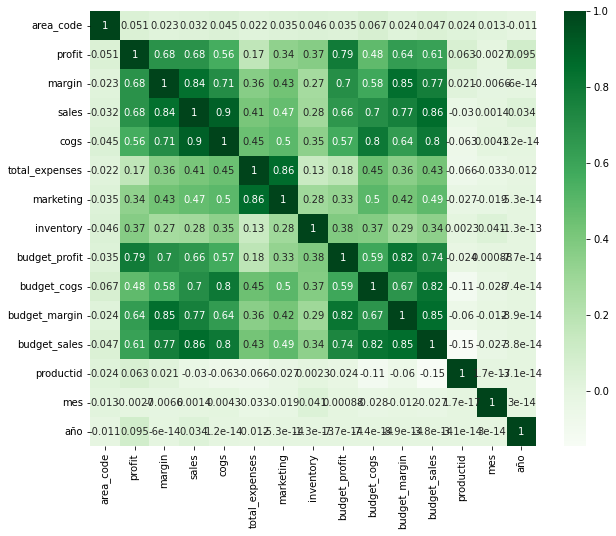

In [5]:
sns.heatmap(sales.corr(),
            cmap = "Greens", 
           annot = True)
plt.savefig('../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/heatmap1.png');

In [6]:
mask = np.triu(np.ones_like(sales.corr(), dtype=np.bool))

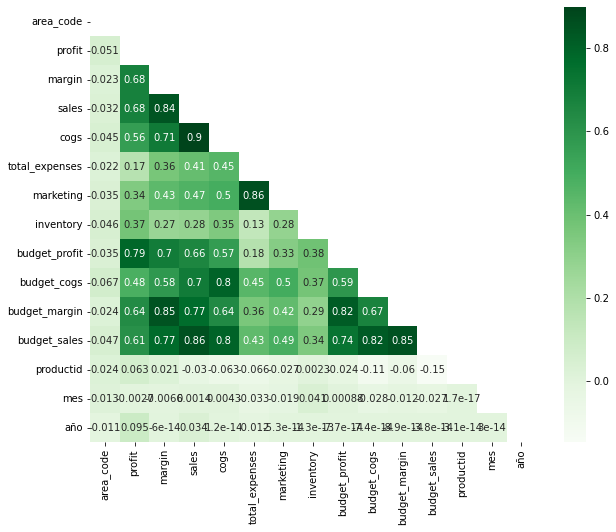

In [7]:
sns.heatmap(sales.corr(),
            cmap = "Greens",
            mask = mask, 
           annot = True);



4. Guardad la gráfica del heatmap.